In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [2]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

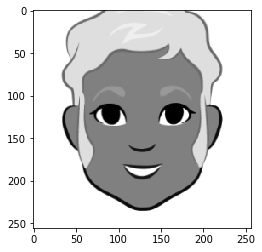

In [29]:
#load test iamge
test1 = cv2.imread('training-data/s1/25.png')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)


#if you have matplotlib installed then  
plt.imshow(gray_img, cmap='gray')  

In [30]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_alt.xml')


In [34]:
#detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  
 
#print the number of faces found 
print('Faces found: ', len(faces))

Faces found:  0


In [35]:
#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

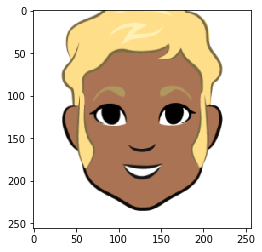

In [36]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

In [8]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.2):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray_im = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
    
    #detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray_im, scaleFactor=scaleFactor, minNeighbors=5);          
    
    #print the number of faces found 
    print('Faces found: ', len(faces))
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
        
    return img_copy

Faces found:  1


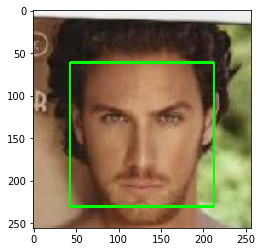

In [9]:
#load another image 
test2 = cv2.imread('training-data/s2/202.png')  
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

Faces found:  1


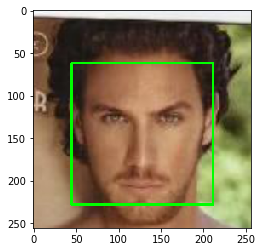

In [10]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade/lbpcascade_frontalface.xml')  
 
#load test image 
test3 = cv2.imread('training-data/s2/202.png') 
 
#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test3)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

In [44]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_alt.xml') 

#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbp_animeface/lbpcascade_animeface.xml')  
 
#load test image1 
test4 = cv2.imread('training-data/s1/indianguy.jpg') 
#load test image2 
test5 = cv2.imread('training-data/s1/indianguy.jpg')

In [45]:
#------------HAAR----------- 
#note time before detection 
t1 = time.time()  
 
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test4)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 
#print the time difference

Faces found:  0


In [46]:
#------------LBP----------- 
#note time before detection 
t1 = time.time() 
 
#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test5)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference

Faces found:  0


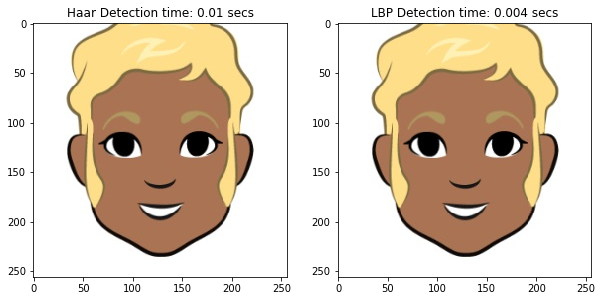

In [47]:
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
 
#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  
 
#show images 
# plt.imshow(faces_detected_img)